In [4]:
import pandas as pd 
import numpy as np 

import pymc3 as pm 
import arviz as av
import seaborn as sns

import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit, least_squares

In [242]:
from sklearn.metrics import r2_score

In [11]:
cd ../

/Users/justinlabrash/Documents/pond_diagnostics


In [12]:
cycles = pd.read_csv('cycles_cleaned.csv')

In [20]:
pl_cost = 10
fixed_cost_day = 12

cycles['cycle_fixed_cost'] = cycles['cycle_days'] * fixed_cost_day * cycles['Hectareas']
cycles['PL_cost'] = (cycles['CantidadSembrada'] / 1000) * pl_cost
cycles['cycle_total_profit_usd'] = cycles['VentaUSDReal'] - cycles['cycle_fixed_cost'] - cycles['cycle_feed_cost'] - cycles['PL_cost']

cycles['cycle_profit_ha_day'] = cycles['cycle_total_profit_usd'] / cycles['Hectareas']/ cycles['cycle_days']


cycles['cycle_survival_rate'] = cycles['CantidadCosechada_harvested'] / cycles['CantidadSembrada']
cycles['weekly_mortality'] = round((100 - cycles['cycle_survival']) / cycles['cycle_days'] * 7 ,2)

cycles['weekly_growth'] = round((cycles['average_weight_harvest'] - cycles['start_weight']) / (cycles['cycle_days'] - cycles['start_cycle_days'])* 7,2)

y_variable_str = 'final_biomass_harvested(000s)'
cycles['final_biomass_harvested_000s'] = cycles['final_biomass_harvested']/ 1000

cycles['density_ha_000s'] = cycles['density_ha']/ 1000

In [101]:
cycles['feed_stocked_000s_day'] = round(cycles['total_feed_given'] / cycles['density_ha_000s'] / cycles['cycle_days'],2)

In [102]:
cycles['feed_stocked_000s_day']

0      2.79
1      2.14
2      2.87
3      2.99
4      1.97
       ... 
424    2.08
425    3.23
426    5.37
427    4.11
428    4.16
Name: feed_stocked_000s_day, Length: 429, dtype: float64

In [66]:
cycles.columns

Index(['Unnamed: 0', 'PKMuestreo', 'FechaMuestreo', 'IDPiscina', 'PKCiclo',
       'KilosAlimento', 'FechaSiembra', 'FechaCosecha', 'CantidadSembrada',
       'Hectareas', 'days_from_last_monitoring', 'cycle_days',
       'survival_updated_at', 'Supervivencia', 'PesoPromedio2',
       'CantidadCosechada', 'biomass_harvested', 'CantidadCosechada_cum',
       'biomass_harvested_cum', 'stocked_minus_harvested', 'live_animals',
       'live_biomass', 'cumulative_biomass', 'kg_ha_day', 'cumulative_fcr',
       'density_ha', 'density_ha_bin', 'biomass_ha', 'NombreProveedor',
       'Proveedor', 'Codigo', 'Especie', 'Origen', 'Proceso', 'Descripcion',
       'MnProveedor', 'total_feed_given', 'cycle_feed_cost', 'start_weight',
       'start_cycle_days', 'CantidadCosechada_harvested', 'VentaUSDReal',
       'average_weight_harvest', 'Parcial', 'final_sale',
       'partial_harvest_qty', 'partial_harvest_rev', 'final_biomass_harvested',
       'cycle_fcr', 'cycle_weekly_growth_rate', 'rev_ha_da

In [68]:
cycles['total_biomass_ha_day'] = round(cycles['final_biomass_harvested'] / cycles['Hectareas']/ cycles['cycle_days'],2)

In [69]:
cycles['total_biomass_ha_day']

0      19.80
1      25.35
2      18.42
3      18.13
4      25.26
       ...  
424    23.44
425    42.38
426    28.25
427    40.63
428    32.26
Name: total_biomass_ha_day, Length: 429, dtype: float64

In [23]:

def get_model_df(df, y_variable):
    return df.dropna(subset = [y_variable]).copy()


In [78]:
model_df[x_variables+[y_variable_str]].head()

,weekly_growth,weekly_mortality,cycle_days,density_ha_000s,total_biomass_ha_day
0,2.15,2.05,104,113.626,19.80
1,2.12,2.09,89,125.000,25.35
2,2.15,2.17,96,86.982,18.42
3,1.71,2.40,79,105.263,18.13
4,1.98,2.45,98,142.926,25.26


In [285]:
data = {
    'x1': [1, 2, 3, 4, 5],
    'x2': [5, 4, 3, 2, 1],
    'x3': [2, 4, 6, 8, 10],
    'x4': [10, 8, 6, 4, 2],
    'y': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)
df_long = pd.melt(df, id_vars='y', var_name='x_variable', value_name='x_value')


In [ ]:
model_df = get_model_df(cycles, y_variable_str)
x_variables = [
    'weekly_growth',
    'weekly_mortality',
    'cycle_days',
    'density_ha_000s' ,
    'cycle_feed_ha_day'
]

model_df['feed_growth'] = model_df['cycle_feed_ha_day'] * model_df['weekly_growth']


In [288]:
fig, axs = plt.subplots(ncols=3)
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

zsh:1: command not found: Show


In [281]:
y_variable_str = 'total_biomass_ha_day'

model_df = get_model_df(cycles, y_variable_str)

y_variable = model_df[y_variable_str]
x_variables = [
    'weekly_growth',
    'weekly_mortality',
    'cycle_days',
    'density_ha_000s' ,
    'cycle_feed_ha_day'
]

growth_feed = model_df['cycle_feed_ha_day'] * model_df['weekly_growth']

for var_name in x_variables:
  exec(f"{var_name} = model_df['{var_name}']")
#y_variable = model_df[y_variable_str]
#biomass_harvested = x 

#weekly_growth = model_df['weekly_growth']
#weekly_mortality = model_df['weekly_mortality']
#cycle_days = model_df['cycle_days']

#stocking_density = model_df['density_ha(000s)']
#survival_rate = model_df['cycle_survival']
#average_weight = model_df['average_weight_harvest']
#fcr = model_df['cycle_fcr']
#feed_kg_ha = model_df['cycle_feed_ha_day']
with pm.Model() as model:
    # Priors for the linear regression coefficients
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_stocking_density = pm.Normal('beta_stocking_density(000s)', mu=0, sd=10)
    beta_cycle_days = pm.Normal('beta_cycle_days', mu=0, sd=10)
    beta_weekly_mortality = pm.Normal('beta_weekly_mortality', mu=0, sd=10)
    #beta_weekly_growth = pm.Normal('beta_weekly_growth', mu=0, sd=10)
    #beta_cycle_feed_ha_day = pm.Normal('beta_cycle_feed_ha_day', mu=0, sd=10)
    beta_growth_feed = pm.Normal('beta_growth_feed', mu=0, sd=10)
    mu = (alpha  
          +beta_stocking_density * density_ha_000s
        #  +beta_cycle_days * cycle_days 
          +beta_weekly_mortality * weekly_mortality 
          +beta_growth_feed * growth_feed
        #  +beta_weekly_growth * weekly_growth
       #   +beta_cycle_feed_ha_day * cycle_feed_ha_day
          )
         # 
    # Likelihood (sampling distribution) of biomass_ha
    biomass_ha_observed = pm.Normal('y_variable_observed', mu=mu, sd=10, observed=y_variable)

# Perform Bayesian inference
with model:
    trace = pm.sample(draws = 2000, tune=1000,init="adapt_diag", idata_kwargs={'log_likelihood':True})
    y_pred = pm.sample_posterior_predictive(trace, samples=100)

/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_growth_feed, beta_weekly_mortality, beta_cycle_days, beta_stocking_density(000s), alpha]


/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/

In [280]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,8.744,6.024,-2.556,20.248,0.114,0.081,2811.0,3854.0,1.0
beta_stocking_density(000s),0.148,0.028,0.095,0.200,0.001,0.000,2912.0,3886.0,1.0
beta_cycle_days,-0.221,0.040,-0.299,-0.148,0.001,0.000,3324.0,4435.0,1.0
beta_weekly_mortality,-3.157,0.507,-4.125,-2.224,0.009,0.006,3082.0,4834.0,1.0
beta_weekly_growth,9.537,1.890,6.062,13.192,0.035,0.025,2937.0,4132.0,1.0
beta_cycle_feed_ha_day,0.097,0.094,-0.072,0.280,0.002,0.001,2809.0,3770.0,1.0


In [282]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,4.655,2.704,-0.406,9.603,0.041,0.029,4481.0,4816.0,1.0
beta_stocking_density(000s),0.062,0.020,0.024,0.097,0.000,0.000,3960.0,4556.0,1.0
beta_cycle_days,-0.134,10.044,-18.150,19.630,0.122,0.115,6793.0,5248.0,1.0
beta_weekly_mortality,-1.462,0.341,-2.092,-0.836,0.004,0.003,6040.0,5028.0,1.0
beta_growth_feed,0.193,0.025,0.146,0.239,0.000,0.000,4336.0,4901.0,1.0


In [268]:
beta_stocking_density_mu = pm.summary(trace).loc['beta_stocking_density(000s)']['mean']
#beta_cycle_days_mu = pm.summary(trace).loc['beta_cycle_days']['mean']
beta_weekly_mortality_mu = pm.summary(trace).loc['beta_weekly_mortality']['mean']
beta_weekly_growth_mu = pm.summary(trace).loc['beta_weekly_growth']['mean']
#beta_cycle_feed_ha_day_mu = pm.summary(trace).loc['beta_cycle_feed_ha_day']['mean']
alpha_mu = pm.summary(trace).loc['alpha']['mean']

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/just

In [269]:
y_predict_df = model_df[x_variables + [y_variable_str]]

In [272]:
y_predict_df['predictions'] = (
  y_predict_df['weekly_growth'] * beta_weekly_growth_mu 
 + y_predict_df['weekly_mortality'] * beta_weekly_mortality_mu 
 + y_predict_df['cycle_days'] * beta_cycle_days_mu 
 + y_predict_df['density_ha_000s'] *beta_stocking_density_mu
 + alpha_mu
)

/var/folders/8q/s2675dcn76s02xw57xss4f040000gn/T/ipykernel_61008/2600720246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_predict_df['predictions'] = (


In [273]:
y_predict_df

,weekly_growth,weekly_mortality,cycle_days,total_biomass_ha_day,predictions
0,2.15,2.05,104,19.80,5.90590
1,2.12,2.09,89,25.35,7.85252
2,2.15,2.17,96,18.42,6.78574
3,1.71,2.40,79,18.13,4.76242
4,1.98,2.45,98,25.26,4.08096
...,...,...,...,...,...
424,2.66,3.98,68,23.44,10.20188
425,2.98,0.32,66,42.38,24.62980
426,2.68,3.11,66,28.25,13.36348
427,3.35,2.92,54,40.63,21.86314


In [274]:
r_squared = r2_score(y_predict_df['total_biomass_ha_day'], y_predict_df['predictions'])
print(f"R-squared (R²) value: {r_squared:.4f}")

R-squared (R²) value: -7.3600


In [220]:
y_pred.keys()

dict_keys(['y_variable_observed'])

In [205]:
r_squared

-1.3272887255728003

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


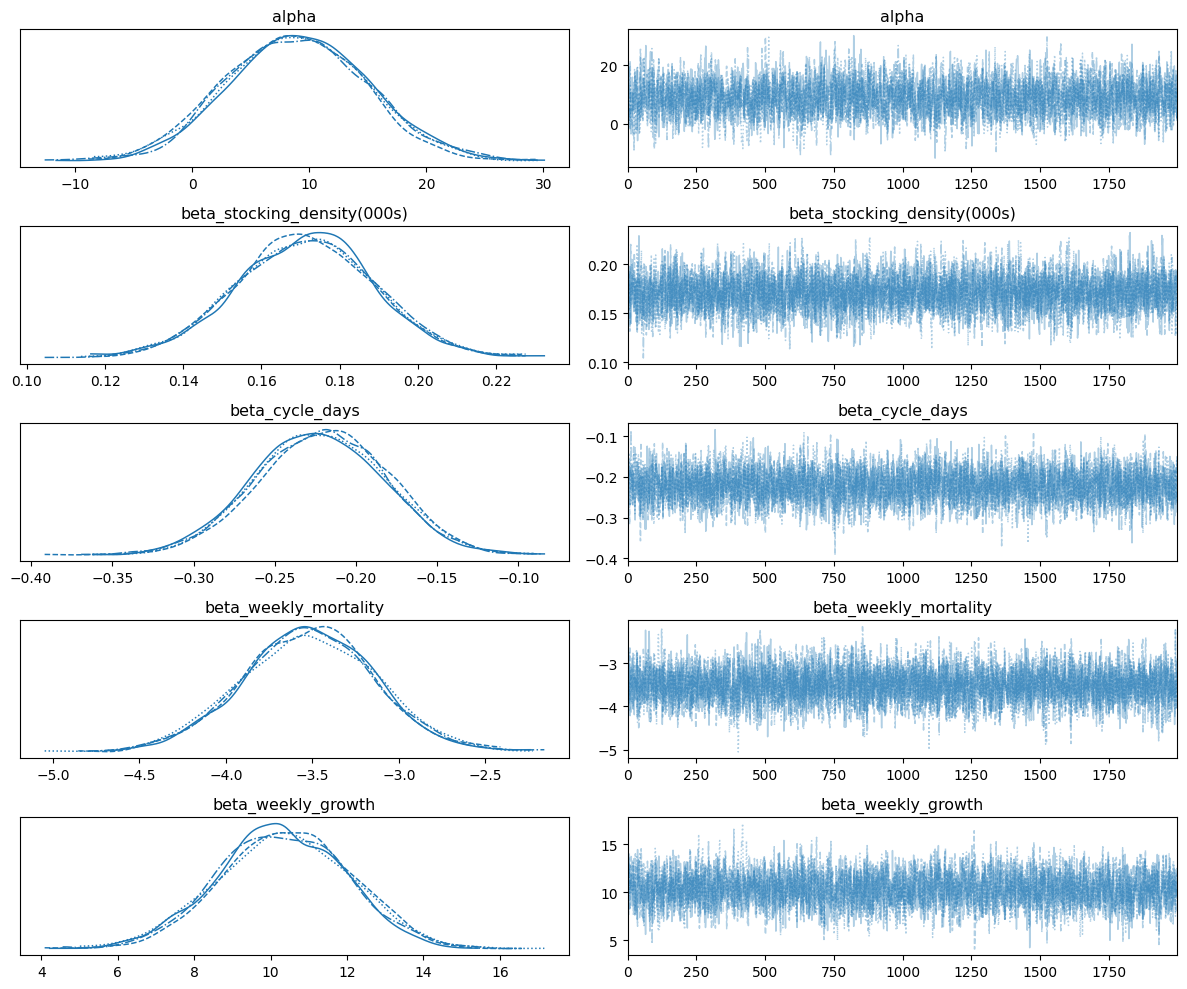

In [80]:
pm.plot_trace(trace)
plt.tight_layout()
plt.savefig('models/bm_m1/biomass_m1_trace_plot.png')

In [207]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,8.930,6.217,-2.826,20.269,0.116,0.082,2854.0,3399.0,1.0
beta_stocking_density(000s),0.171,0.018,0.136,0.203,0.000,0.000,5471.0,4996.0,1.0
beta_cycle_days,-0.220,0.040,-0.296,-0.146,0.001,0.000,3842.0,4562.0,1.0
beta_weekly_mortality,-3.518,0.377,-4.190,-2.800,0.006,0.004,4092.0,4878.0,1.0
beta_weekly_growth,10.311,1.773,6.934,13.626,0.032,0.023,3096.0,3505.0,1.0


In [283]:
az.loo(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 posterior samples and 429 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1413.73     2.21
p_loo        0.56        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      429  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [87]:
y_variable_str = 'total_biomass_ha_day'


model_df = get_model_df(cycles, y_variable_str)

y_variable = model_df[y_variable_str]
x_variables = [
    'weekly_growth',
    'weekly_mortality',
    'density_ha_000s'  
]

for var_name in x_variables:
  exec(f"{var_name} = model_df['{var_name}']")
#y_variable = model_df[y_variable_str]
#biomass_harvested = x 

#weekly_growth = model_df['weekly_growth']
#weekly_mortality = model_df['weekly_mortality']
#cycle_days = model_df['cycle_days']

#stocking_density = model_df['density_ha(000s)']
#survival_rate = model_df['cycle_survival']
#average_weight = model_df['average_weight_harvest']
#fcr = model_df['cycle_fcr']
#feed_kg_ha = model_df['cycle_feed_ha_day']
with pm.Model() as model_2:
    # Priors for the linear regression coefficients
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_stocking_density = pm.Normal('beta_stocking_density(000s)', mu=0, sd=10)
   # beta_cycle_days = pm.Normal('beta_cycle_days', mu=0, sd=10)
    beta_weekly_mortality = pm.Normal('beta_weekly_mortality', mu=0, sd=10)
    beta_weekly_growth = pm.Normal('beta_weekly_growth', mu=0, sd=10)
    mu = (alpha  
         +beta_stocking_density * density_ha_000s
         # +beta_cycle_days * cycle_days 
          +beta_weekly_mortality * weekly_mortality 
          +beta_weekly_growth * weekly_growth
          )
         # +beta_fcr * fcr
          
    
    # Likelihood (sampling distribution) of biomass_ha
    biomass_ha_observed = pm.Normal('y_variable_observed', mu=mu, sd=10, observed=y_variable)

# Perform Bayesian inference
with model_2:
    trace_2 = pm.sample(draws = 2000, tune=1000,init="adapt_diag", idata_kwargs={'log_likelihood':True})
    y_pred_2 = pm.sample_posterior_predictive(trace_2, samples=500)

/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_weekly_growth, beta_weekly_mortality, beta_stocking_density(000s), alpha]


/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/

In [88]:
model_df[x_variables+[y_variable_str]].head()

,weekly_growth,weekly_mortality,density_ha_000s,total_biomass_ha_day
0,2.15,2.05,113.626,19.80
1,2.12,2.09,125.000,25.35
2,2.15,2.17,86.982,18.42
3,1.71,2.40,105.263,18.13
4,1.98,2.45,142.926,25.26


In [83]:
az.loo(trace_2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 posterior samples and 429 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1405.66     2.00
p_loo        0.41        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      429  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [82]:
pm.summary(trace_2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-15.344,4.129,-23.077,-7.494,0.075,0.053,3014.0,3604.0,1.0
beta_stocking_density(000s),0.154,0.018,0.121,0.188,0.000,0.000,4183.0,3985.0,1.0
beta_weekly_mortality,-3.347,0.379,-4.039,-2.625,0.006,0.004,3987.0,4414.0,1.0
beta_weekly_growth,13.830,1.606,10.848,16.853,0.028,0.020,3366.0,3784.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


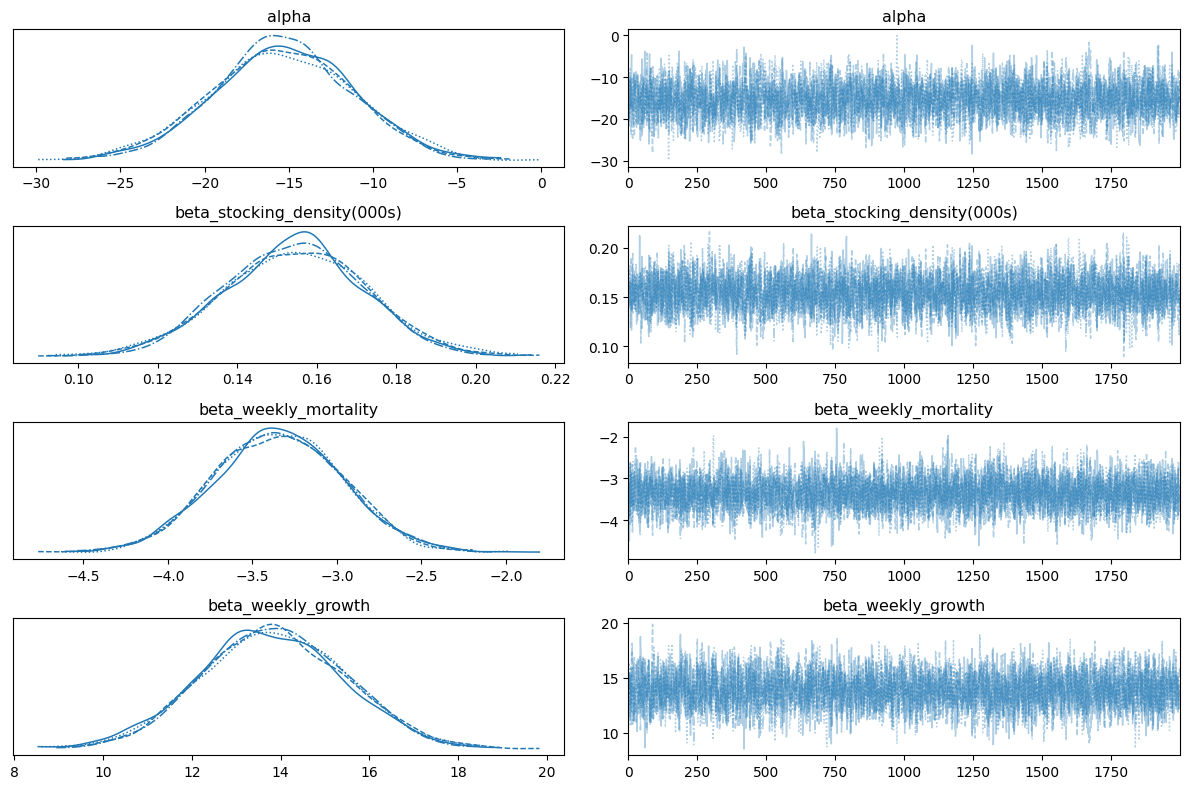

In [84]:
pm.plot_trace(trace_2)
plt.tight_layout()
plt.savefig('models/bm_m2/biomass_m2_trace_plot.png')

In [61]:
cycles.rename(columns = {'kg/ha/day':'kg_ha_day'}, inplace = True)

In [89]:
y_variable_str = 'total_biomass_ha_day'

model_df = get_model_df(cycles, y_variable_str)

y_variable = model_df[y_variable_str]
x_variables = [
    'weekly_growth',
    'weekly_mortality',
    'cycle_days',
    'density_ha_000s',
    'cycle_feed_ha_day'  
]

for var_name in x_variables:
  exec(f"{var_name} = model_df['{var_name}']")
#y_variable = model_df[y_variable_str]
#biomass_harvested = x 

#weekly_growth = model_df['weekly_growth']
#weekly_mortality = model_df['weekly_mortality']
#cycle_days = model_df['cycle_days']

#stocking_density = model_df['density_ha(000s)']
#survival_rate = model_df['cycle_survival']
#average_weight = model_df['average_weight_harvest']
#fcr = model_df['cycle_fcr']
#feed_kg_ha = model_df['cycle_feed_ha_day']
with pm.Model() as model_3:
    # Priors for the linear regression coefficients
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_stocking_density = pm.Normal('beta_stocking_density(000s)', mu=0, sd=10)
    beta_cycle_days = pm.Normal('beta_cycle_days', mu=0, sd=10)
    beta_weekly_mortality = pm.Normal('beta_weekly_mortality', mu=0, sd=10)
    beta_weekly_growth = pm.Normal('beta_weekly_growth', mu=0, sd=10)
    beta_feed_kg_ha_day = pm.Normal('beta_cycle_feed_ha_day', mu=0, sd=10)
    mu = (alpha  
         +beta_stocking_density * density_ha_000s
          +beta_cycle_days * cycle_days 
          +beta_weekly_mortality * weekly_mortality 
          +beta_weekly_growth * weekly_growth
          + beta_feed_kg_ha_day * cycle_feed_ha_day
          )
         # +beta_fcr * fcr
          
    
    # Likelihood (sampling distribution) of biomass_ha
    biomass_ha_observed = pm.Normal('y_variable_observed', mu=mu, sd=10, observed=y_variable)

# Perform Bayesian inference
with model_3:
    trace_3 = pm.sample(draws = 2000, tune=1000,init="adapt_diag", idata_kwargs={'log_likelihood':True})
    y_pred_3 = pm.sample_posterior_predictive(trace_3, samples=500)

/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_cycle_feed_ha_day, beta_weekly_growth, beta_weekly_mortality, beta_cycle_days, beta_stocking_density(000s), alpha]


/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/

In [90]:
pm.summary(trace_3)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,8.668,6.060,-2.503,20.218,0.114,0.081,2818.0,3686.0,1.0
beta_stocking_density(000s),0.148,0.029,0.095,0.202,0.001,0.000,2892.0,4090.0,1.0
beta_cycle_days,-0.221,0.040,-0.298,-0.147,0.001,0.001,3167.0,4098.0,1.0
beta_weekly_mortality,-3.152,0.514,-4.104,-2.163,0.009,0.006,3179.0,3862.0,1.0
beta_weekly_growth,9.529,1.896,6.277,13.278,0.034,0.024,3114.0,4703.0,1.0
beta_cycle_feed_ha_day,0.098,0.095,-0.076,0.281,0.002,0.001,2830.0,3503.0,1.0


In [91]:
az.loo(trace_3)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 posterior samples and 429 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1391.98     0.65
p_loo        0.28        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      429  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [92]:
model_df[x_variables+[y_variable_str]].head()

,weekly_growth,weekly_mortality,cycle_days,density_ha_000s,cycle_feed_ha_day,total_biomass_ha_day
0,2.15,2.05,104,113.626,34.83,19.80
1,2.12,2.09,89,125.000,35.26,25.35
2,2.15,2.17,96,86.982,32.05,18.42
3,1.71,2.40,79,105.263,33.11,18.13
4,1.98,2.45,98,142.926,33.10,25.26


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


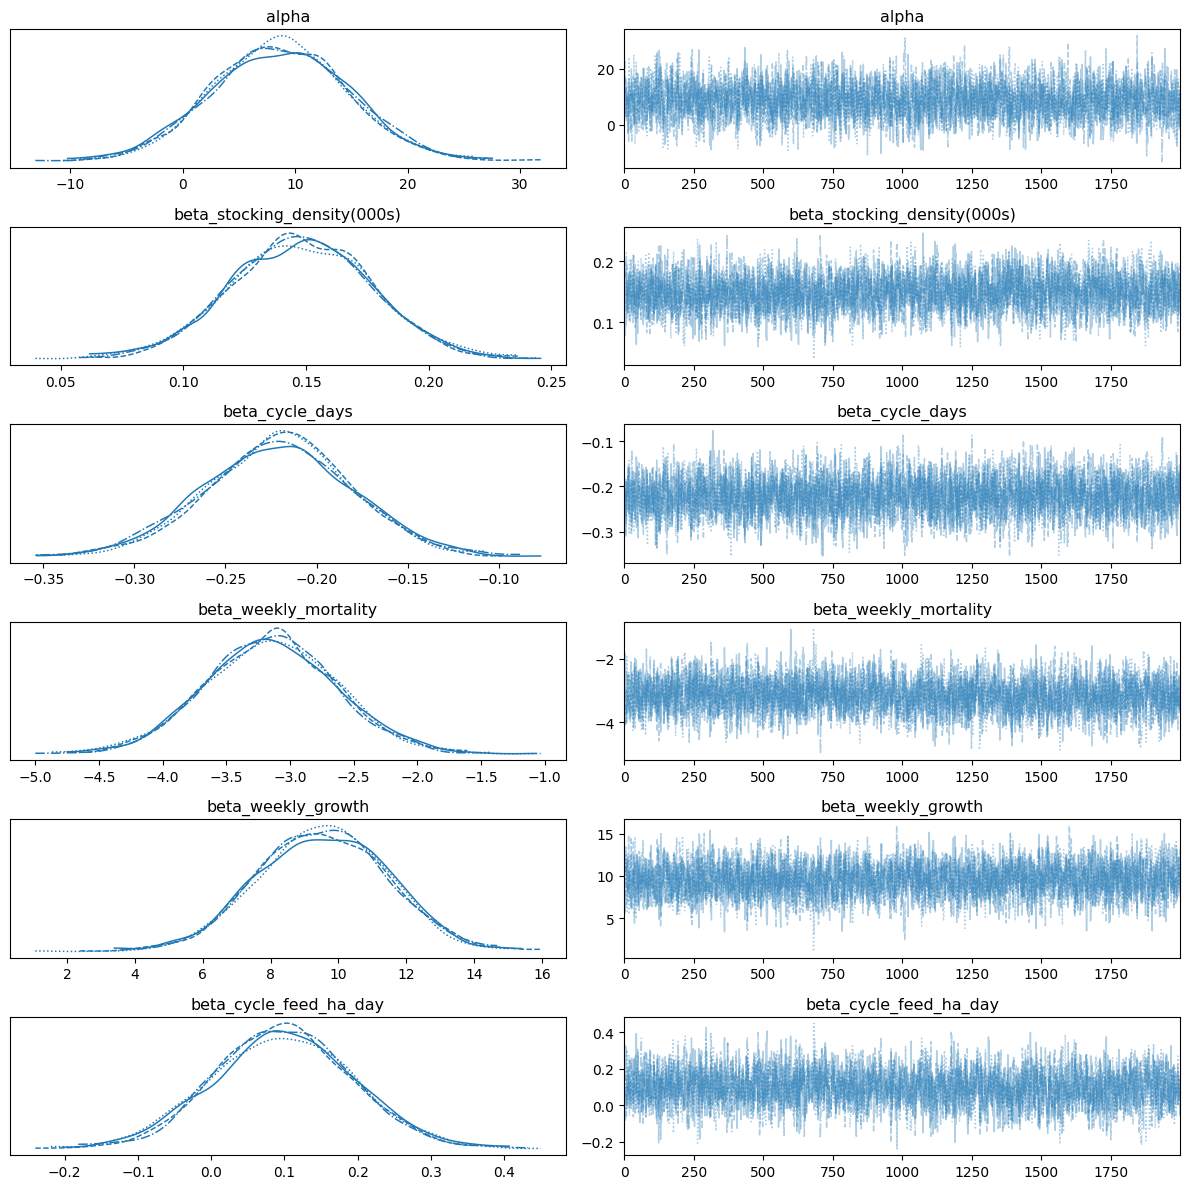

In [93]:

pm.plot_trace(trace_3)
plt.tight_layout()
plt.savefig('models/bm_m3/biomass_m3_trace_plot.png')

In [103]:
y_variable_str = 'total_biomass_ha_day'

model_df = get_model_df(cycles, y_variable_str)

y_variable = model_df[y_variable_str]
x_variables = [
    'weekly_growth',
    'weekly_mortality',
    'cycle_days',
    'density_ha_000s',
    'feed_stocked_000s_day'  
]

for var_name in x_variables:
  exec(f"{var_name} = model_df['{var_name}']")
#y_variable = model_df[y_variable_str]
#biomass_harvested = x 

#weekly_growth = model_df['weekly_growth']
#weekly_mortality = model_df['weekly_mortality']
#cycle_days = model_df['cycle_days']

#stocking_density = model_df['density_ha(000s)']
#survival_rate = model_df['cycle_survival']
#average_weight = model_df['average_weight_harvest']
#fcr = model_df['cycle_fcr']
#feed_kg_ha = model_df['cycle_feed_ha_day']
with pm.Model() as model_5:
    # Priors for the linear regression coefficients
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_stocking_density = pm.Normal('beta_stocking_density(000s)', mu=0, sd=10)
    beta_cycle_days = pm.Normal('beta_cycle_days', mu=0, sd=10)
    beta_weekly_mortality = pm.Normal('beta_weekly_mortality', mu=0, sd=10)
    beta_weekly_growth = pm.Normal('beta_weekly_growth', mu=0, sd=10)
    beta_feed_stocked_000s_day = pm.Normal('beta_feed_stocked_000s_day', mu=0, sd=10)
    mu = (alpha  
         +beta_stocking_density * density_ha_000s
          +beta_cycle_days * cycle_days 
          +beta_weekly_mortality * weekly_mortality 
          +beta_weekly_growth * weekly_growth
          + beta_feed_stocked_000s_day * feed_stocked_000s_day
          )
         # +beta_fcr * fcr
          
    
    # Likelihood (sampling distribution) of biomass_ha
    biomass_ha_observed = pm.Normal('y_variable_observed', mu=mu, sd=10, observed=y_variable)

# Perform Bayesian inference
with model_5:
    trace_5 = pm.sample(draws = 2000, tune=1000,init="adapt_diag", idata_kwargs={'log_likelihood':True})
    y_pred_5 = pm.sample_posterior_predictive(trace_4, samples=500)

/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_feed_stocked_000s_day, beta_weekly_growth, beta_weekly_mortality, beta_cycle_days, beta_stocking_density(000s), alpha]


/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.
The acceptance probability does not match the target. It is 0.878607588156135, b

In [104]:
az.loo(trace_5)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 posterior samples and 429 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1392.38     0.72
p_loo        0.30        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      429  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [105]:
pm.summary(trace_5)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,9.202,6.164,-3.041,20.168,0.120,0.085,2625.0,3681.0,1.0
beta_stocking_density(000s),0.170,0.018,0.137,0.204,0.000,0.000,5026.0,5365.0,1.0
beta_cycle_days,-0.220,0.040,-0.296,-0.144,0.001,0.000,3379.0,4418.0,1.0
beta_weekly_mortality,-3.544,0.402,-4.315,-2.798,0.005,0.004,5652.0,5595.0,1.0
beta_weekly_growth,10.397,1.754,7.185,13.689,0.030,0.021,3373.0,4231.0,1.0
beta_feed_stocked_000s_day,-0.075,0.363,-0.749,0.625,0.005,0.004,4785.0,5152.0,1.0


In [106]:
model_df[x_variables+[y_variable_str]].head()

,weekly_growth,weekly_mortality,cycle_days,density_ha_000s,feed_stocked_000s_day,total_biomass_ha_day
0,2.15,2.05,104,113.626,2.79,19.80
1,2.12,2.09,89,125.000,2.14,25.35
2,2.15,2.17,96,86.982,2.87,18.42
3,1.71,2.40,79,105.263,2.99,18.13
4,1.98,2.45,98,142.926,1.97,25.26


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


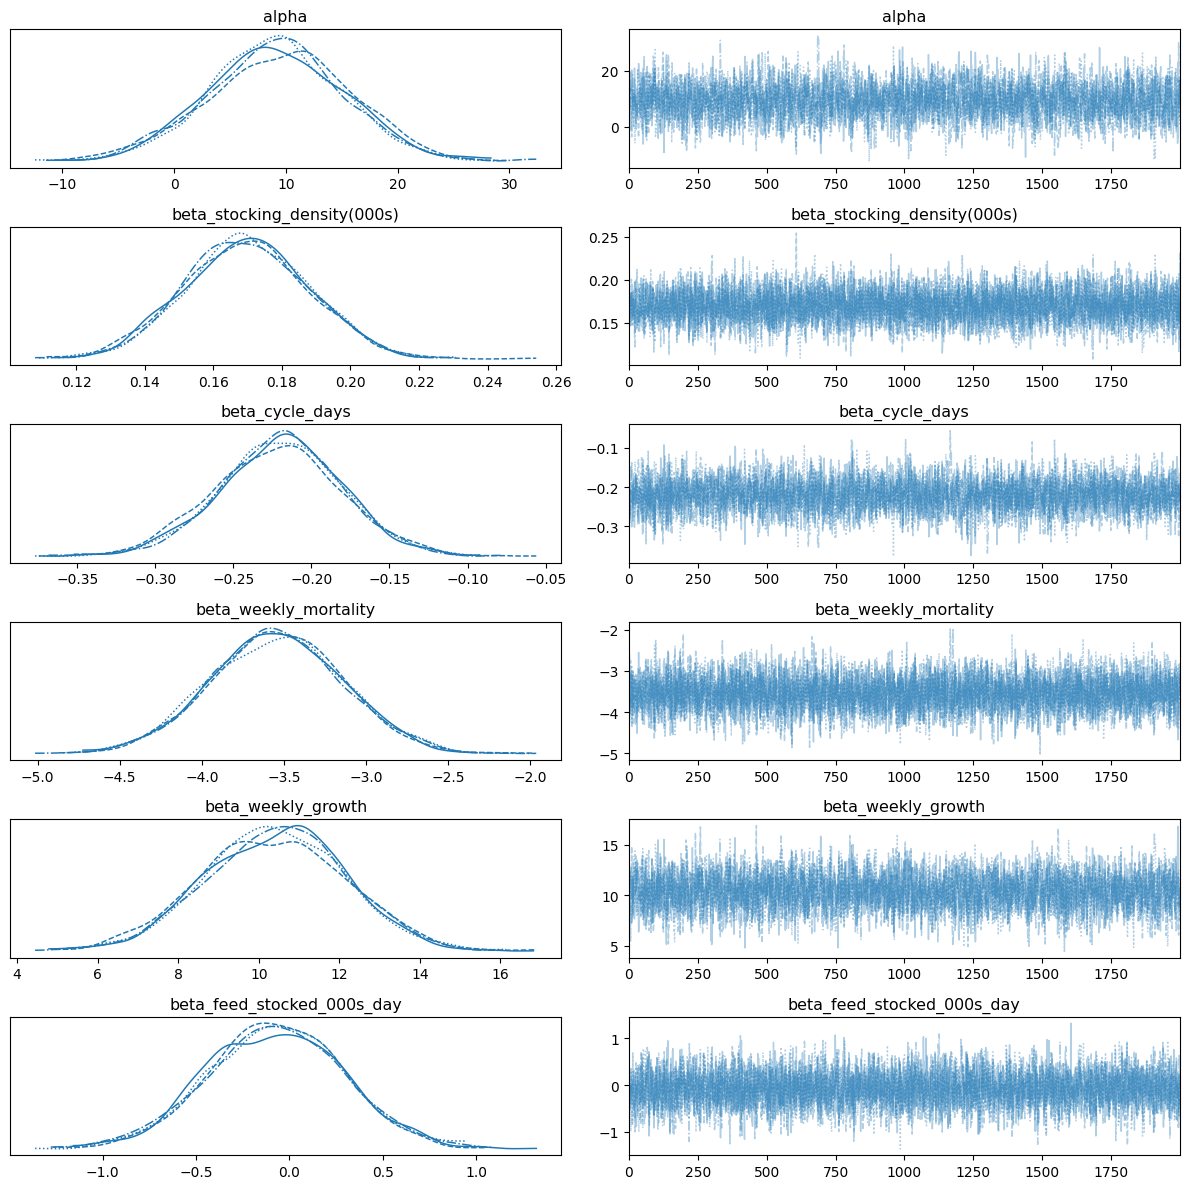

In [107]:

pm.plot_trace(trace_5)
plt.tight_layout()
plt.savefig('models/bm_m5/biomass_m5_trace_plot.png')

In [188]:
y_variable_str = 'total_biomass_ha_day'

model_df = get_model_df(cycles, y_variable_str)

y_variable = model_df[y_variable_str]
x_variables = [
#    'weekly_growth',
    'weekly_mortality',
    'cycle_days',
    'density_ha_000s',
    'feed_stocked_000s_day',
    'cycle_feed_ha_day' ,
    'cycle_fcr'
]

for var_name in x_variables:
  exec(f"{var_name} = model_df['{var_name}']")
#y_variable = model_df[y_variable_str]
#biomass_harvested = x 

#weekly_growth = model_df['weekly_growth']
#weekly_mortality = model_df['weekly_mortality']
#cycle_days = model_df['cycle_days']

#stocking_density = model_df['density_ha(000s)']
#survival_rate = model_df['cycle_survival']
#average_weight = model_df['average_weight_harvest']
#fcr = model_df['cycle_fcr']
#feed_kg_ha = model_df['cycle_feed_ha_day']
with pm.Model() as model_5:
    # Priors for the linear regression coefficients
    alpha = pm.Normal('alpha', mu=0, sd=10)
   # beta_stocking_density = pm.Normal('beta_stocking_density(000s)', mu=0, sd=10)
   # beta_cycle_days = pm.Normal('beta_cycle_days', mu=0, sd=10)
  #  beta_weekly_mortality = pm.Normal('beta_weekly_mortality', mu=0, sd=10)
    #beta_weekly_growth = pm.Normal('beta_weekly_growth', mu=0, sd=10)
   # beta_feed_stocked_000s_day = pm.Normal('beta_feed_stocked_000s_day', mu=0, sd=10)
  #  beta_cycle_feed_ha_day = pm.Normal('beta_cycle_feed_ha_day', mu=0, sd=10)
    beta_cycle_fcr = pm.Normal('beta_cycle_fcr', mu=0, sd=10)
    mu = (alpha  
        # +beta_stocking_density * density_ha_000s
        #  +beta_cycle_days * cycle_days 
        #  +beta_weekly_mortality * weekly_mortality 
         # +beta_weekly_growth * weekly_growth
         # + beta_feed_stocked_000s_day * feed_stocked_000s_day
        #  + beta_cycle_feed_ha_day * cycle_feed_ha_day
         #cycle_feed_ha_day
          + beta_cycle_fcr * cycle_fcr
          )
         # +beta_fcr * fcr
          
    
    # Likelihood (sampling distribution) of biomass_ha
    biomass_ha_observed = pm.Normal('y_variable_observed', mu=mu, sd=10, observed=y_variable)

# Perform Bayesian inference
with model_5:
    trace_5 = pm.sample(draws = 2000, tune=1000,init="adapt_diag", idata_kwargs={'log_likelihood':True})
    y_pred_5 = pm.sample_posterior_predictive(trace_5, samples=500)

/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_cycle_fcr, alpha]


/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/j

In [189]:
trace_5[0]

{'alpha': 38.76321200493617, 'beta_cycle_fcr': -7.742737883332942}

In [191]:
y_pred_5['y_variable_observed']

array([[27.45553082, 29.10681734, 25.80428646, ..., 31.23494773,
        18.31022529, 38.21753512],
       [38.71368644, 30.35439382, 30.45878611, ..., 20.86252582,
        26.61096401, 26.66152426],
       [17.81113598, 26.09931353, 29.55733228, ..., 36.28808921,
        37.41401019, 25.90516993],
       ...,
       [41.11525464, 29.83482461, 22.17419241, ..., 25.75604353,
        18.62074862, 29.08321205],
       [19.8052878 , 42.378757  , 35.2001606 , ..., 21.47350697,
        24.45691205, 25.64588606],
       [32.29483819, 22.61432176, 29.99909119, ..., 26.80448462,
        32.3491949 , 14.05800838]])

In [195]:
tss

19726.294417249417

In [196]:
rss

47074.185810064686

In [198]:
observed_mean = y_variable.mean()  # Mean of the observed data

# Calculate the total sum of squares (TSS)
tss = ((y_variable - observed_mean) ** 2).sum()

# Calculate the residual sum of squares (RSS)
y_pred = y_pred_5['y_variable_observed'][1]
rss = ((y_variable - y_pred) ** 2).sum()

r_squared = 1 - (rss / tss)

In [202]:
y_pred

array([38.71368644, 30.35439382, 30.45878611, 24.54009995, 27.88307946,
       21.13186036, 18.00653191, 46.10823538, 21.37819705, 16.47577203,
       17.68036807, 41.35495061, 38.83839213, 23.81780079, 38.23141754,
       28.51187239, 25.58105854, 23.32885904, 19.87611034, 22.57913033,
        9.29352268, 40.6906906 , 22.78564768, 38.76646443, 25.25749053,
       18.79471653, 15.72633038, 22.7550493 , 31.58539645, 17.67959732,
       42.38066804, -0.78550604, 10.51959783, 43.91706602, 17.47156846,
       18.20036395, 38.0825155 ,  7.43920986, 28.57859203, 25.83497932,
       25.52383979, 24.25781012,  5.55211033, 27.24961708, 18.11021337,
       19.24588349,  6.24413275, 21.35098967, 30.60753263, 33.83201439,
       17.10551933, 33.80567631, 28.78540462, 39.74055987, 20.35270882,
       26.10599891, 24.08751721, 33.72468693,  9.89785483, 29.72728537,
       14.46019175, 11.3079673 , 24.52106483, 21.5115434 , 24.27247173,
       26.06878094, 14.89282964, 33.15505852, 26.98639032, 29.62

In [201]:
y_variable

0      19.80
1      25.35
2      18.42
3      18.13
4      25.26
       ...  
424    23.44
425    42.38
426    28.25
427    40.63
428    32.26
Name: total_biomass_ha_day, Length: 429, dtype: float64

In [180]:
rss

45326.3557278682

In [159]:
model_df[x_variables + [y_variable_str]].corr()

,weekly_mortality,cycle_days,density_ha_000s,feed_stocked_000s_day,cycle_feed_ha_day,cycle_fcr,total_biomass_ha_day
weekly_mortality,1.000000,-0.293819,0.029193,-0.270085,-0.434147,0.130288,-0.373729
cycle_days,-0.293819,1.000000,0.133428,-0.003360,0.104514,0.615240,-0.433430
density_ha_000s,0.029193,0.133428,1.000000,-0.289930,0.641878,0.003826,0.492600
feed_stocked_000s_day,-0.270085,-0.003360,-0.289930,1.000000,-0.009265,-0.031466,-0.017251
cycle_feed_ha_day,-0.434147,0.104514,0.641878,-0.009265,1.000000,0.107852,0.681258
cycle_fcr,0.130288,0.615240,0.003826,-0.031466,0.107852,1.000000,-0.616941
total_biomass_ha_day,-0.373729,-0.433430,0.492600,-0.017251,0.681258,-0.616941,1.000000


In [160]:
pm.summary(trace_5)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,23.771,3.147,17.887,29.601,0.061,0.043,2676.0,3087.0,1.0
beta_cycle_feed_ha_day,0.599,0.054,0.497,0.697,0.001,0.001,3016.0,2461.0,1.0
beta_cycle_fcr,-13.730,1.495,-16.609,-10.923,0.026,0.018,3445.0,3121.0,1.0


In [161]:
az.loo(trace_5)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 posterior samples and 429 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1389.35     0.83
p_loo        0.20        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      429  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/justinlabrash/Documents/pond_diagnostics/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


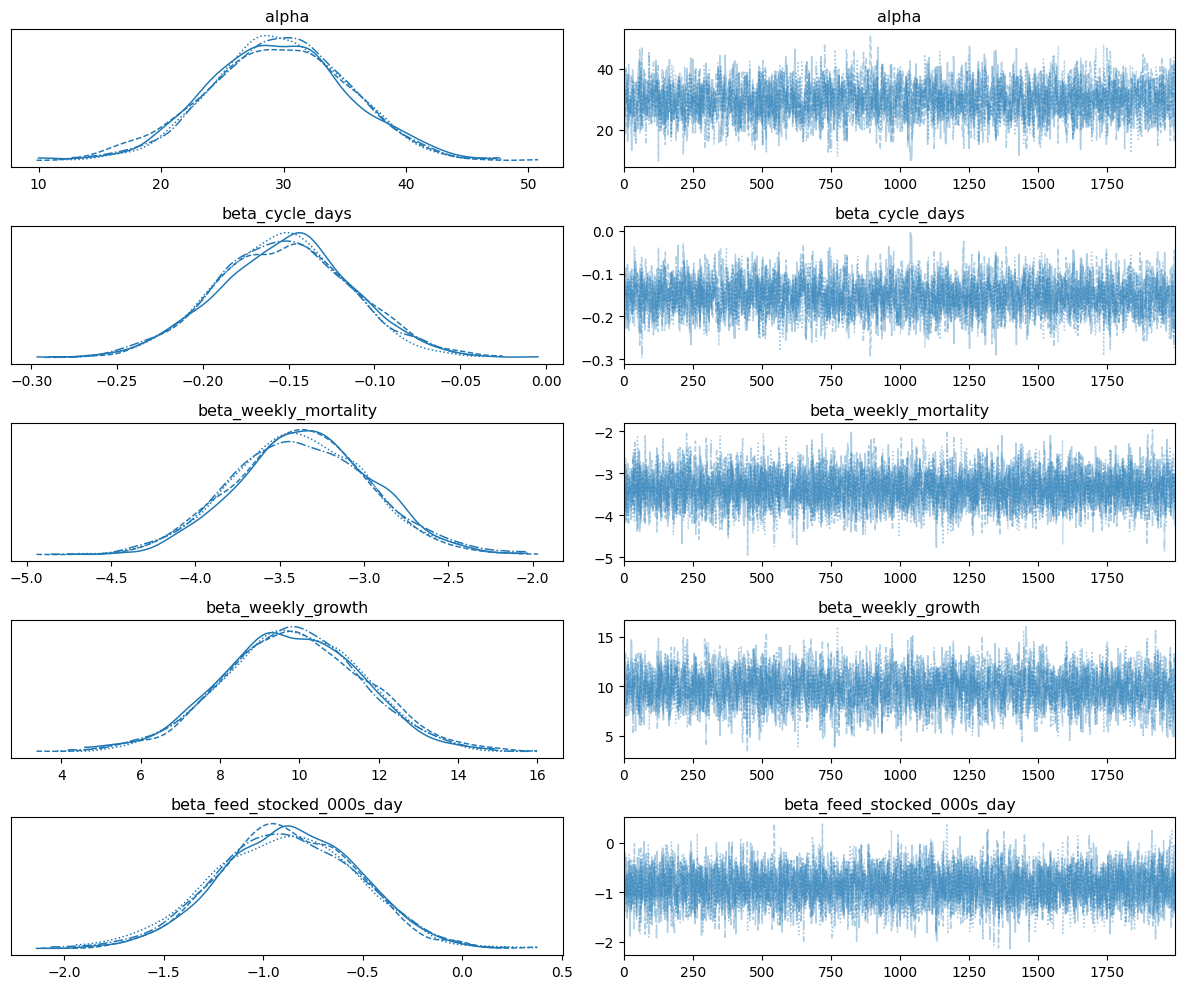

In [120]:

pm.plot_trace(trace_5)
plt.tight_layout()
plt.savefig('models/bm_m5/biomass_m5_trace_plot.png')